<a href="https://colab.research.google.com/github/johanjan/MOOC-HPFEM-source/blob/master/DigiMat_Pro_Covid_19_2021_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DigiMat Pro: Navier-Stokes fluid flow Direct FEM Simulation (DFS)



<p>Incompressible Navier-Stokes as model for low and high Reynolds number flow, such as blood flow and flight: <span class="math display">\begin{array}{rcll} 
R(\hat{u}) &;=&
\begin{cases}
  \partial_t u + (u\cdot \nabla) u + \nabla p - \nu \Delta u = 0\\
  \nabla \cdot u = 0
\end{cases}\\
u &;=& 0, x \in \Gamma \quad (\text{No-slip BC for low Reynolds number})\\
\hat{u} &=& (u, p), \quad r(\hat{u}, \hat{v}) = (R(\hat{u}), \hat{v}) \quad (\text{Weak residual})
\end{array}</span></p>
<dl>
<dt>Space-time cG(1)cG(1) FEM with GLS stabilization. Developed over 20+ years by Johnson, Hoffman, Jansson, etc.</dt>
<dd><p><span class="math display">\begin{aligned}
  &r(\hat{U}, \hat{v}) = (R(\hat{U}), \hat{v}) + (\delta R(\hat{U}), R(\hat{v})) = 0\\
  &\delta = h, \, \forall \hat{v} \in \hat{V}_h, \, \hat{U} \in \hat{V}_h\end{aligned}</span></p>
</dd>

### FEniCS DFS formulation to run and modify yourself

In [1]:
#@title
# Setup system environment and define utility functions and variables


from google.colab import files

try:
    import dolfin
except ImportError as e:
    !apt-get install -y -qq software-properties-common
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    !sed -i "s|#if PETSC_VERSION_MAJOR == 3 && PETSC_VERSION_MINOR <= 8 && PETSC_VERSION_RELEASE == 1|#if 1|" /usr/include/dolfin/la/PETScLUSolver.h
    !rm -rf /usr/lib/python3/dist-packages/mpi4py*
    !rm -rf /usr/lib/python3/dist-packages/petsc4py*
    !rm -rf /usr/lib/python3/dist-packages/slepc4py*
    !rm -rf /usr/lib/petsc/lib/python3/dist-packages/dolfin*
    !rm -rf /usr/lib/petsc/lib/python3/dist-packages/mshr*
    !wget "https://drive.google.com/uc?export=download&id=1cT_QBJCOW_eL3BThnval3bcpb8o0w-Ad" -O /tmp/mpi4py-2.0.0-cp37-cp37m-linux_x86_64.whl
    !wget "https://drive.google.com/uc?export=download&id=119i49bxlGn1mrnhTNmOvM4BqmjrT9Ppr" -O /tmp/petsc4py-3.7.0-cp37-cp37m-linux_x86_64.whl
    !wget "https://drive.google.com/uc?export=download&id=1-1tVfu8qz3bRC2zvR8n3RESpesWqNnn6" -O /tmp/slepc4py-3.7.0-cp37-cp37m-linux_x86_64.whl
    !wget "https://drive.google.com/uc?export=download&id=1-3qY4VIJQaXVO1HfGQIzTIURIeJbvX-9" -O /tmp/fenics_dolfin-2019.2.0.dev0-cp37-cp37m-linux_x86_64.whl
    !wget "https://drive.google.com/uc?export=download&id=1-5SMjgjMuee_9WLeYtGe8N_lvipWEN7W" -O /tmp/mshr-2019.2.0.dev0-cp37-cp37m-linux_x86_64.whl
    !pip3 install /tmp/mpi4py-2.0.0-cp37-cp37m-linux_x86_64.whl --upgrade
    !pip3 install /tmp/petsc4py-3.7.0-cp37-cp37m-linux_x86_64.whl --upgrade
    !pip3 install /tmp/slepc4py-3.7.0-cp37-cp37m-linux_x86_64.whl --upgrade
    !pip3 install /tmp/fenics_dolfin-2019.2.0.dev0-cp37-cp37m-linux_x86_64.whl --upgrade
    !pip3 install /tmp/mshr-2019.2.0.dev0-cp37-cp37m-linux_x86_64.whl --upgrade
    !pip3 -q install --upgrade sympy
    import dolfin


!wget -c http://www.csc.kth.se/~jjan/digitalmath/plot_u.py
!wget -c -O ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit.tar.gz 'https://www.paraview.org/paraview-downloads/download.php?submit=Download&version=v5.9&type=binary&os=Linux&downloadFile=ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit.tar.gz'
!tar xzvf ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit.tar.gz --skip-old-files


Streaming output truncated to the last 5000 lines.
ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit/lib/python3.8/site-packages/numpy/core/include/numpy/arrayscalars.h
ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit/lib/python3.8/site-packages/numpy/core/include/numpy/halffloat.h
ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit/lib/python3.8/site-packages/numpy/core/include/numpy/multiarray_api.txt
ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h
ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h
ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit/lib/python3.8/site-packages/numpy/core/include/numpy/noprefix.h
ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h
ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit/lib/python3.8/site-packages/numpy/core/include/numpy/npy_3kcompat.h
ParaView-5.9.

In [2]:
%%writefile file.py

# Copyright (c) 2017-2018 Johan Jansson, Måns Andersson, Cem Degirmenci, David Kamensky, FEniCS community contributions 

import time

from dolfin import *
from mshr import *

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import dolfin.common.plotting as fenicsplot

XMIN = 0.; XMAX = 4; YMIN = 0; YMAX = 1.; G = [XMIN, XMAX, YMIN, YMAX]; eps = 1e-5; mresolution=30 # Geometry and mesh
mesh = generate_mesh(Rectangle(Point(G[0], G[2]), Point(G[1], G[3])) - Circle(Point(.5, .5), .1), mresolution)
#mesh = Mesh("mesh.xml")
VE = VectorElement("CG", mesh.ufl_cell(), 1); QE = FiniteElement("CG", mesh.ufl_cell(), 1); h = CellDiameter(mesh); # FEM functions
WE = VE * QE; W = FunctionSpace(mesh, WE); V = FunctionSpace(mesh, VE); Q = FunctionSpace(mesh, QE) # Make a mixed space
(v, q) = TestFunctions(W); w = Function(W); (u, p) = (as_vector((w[0], w[1])), w[2]); u0 = Function(V)

uin = Expression(("4*(x[1]*(YMAX-x[1]))/(YMAX*YMAX)", "0."), YMAX=YMAX, element = V.ufl_element()) # Inflow velocity
om = Expression("x[0] > XMAX - eps ? 1. : 0.", XMAX=XMAX, eps=eps, element = Q.ufl_element()) # Mark regions for boundary conditions
im = Expression("x[0] < XMIN + eps ? 1. : 0.", XMIN=XMIN, eps=eps, element = Q.ufl_element())
nm = Expression("x[0] > XMIN + eps && x[0] < XMAX - eps ? 1. : 0.", XMIN=XMIN, XMAX=XMAX, eps=eps, element = Q.ufl_element())

uinitial = Expression(("4*sin(4*x[0])", "0."), YMAX=YMAX, element = V.ufl_element()) # Inflow velocity

stepcounter = 0; 

from fenics import *

u0 = project(uinitial, V);
#u0.vector()[:] = 0.0
#u0.vector()[10] = 1.0

print("u0 norm initial:", u0.vector().norm("linf"))

k = 0.1; nu = 1e-1; d = h # Timestep, viscosity and stabilization parameters
t, T = 0., 0.4; gamma = 10*1./h # Time interval and penalty parameter

theta = 0.5 # 0.5 - Midpoint rule, 1.0 - Implicit Euler, 0.0 - Explicit Euler
while t < T: # Time-stepping loop
    um = theta*u + (1.0-theta)*u0 # Weak residual of FEM for Covid-19 eq.
    r = ((inner((u - u0)/k, v) + nu*inner(grad(um), grad(v)) + p*q)*dx)# +
        #gamma*(om*p*q + im*inner(u - uin, v) + nm*inner(u, v))*ds) # + # Weak boundary conditions
    solve(r==0, w)  # Solve the PDE (one timestep)
    t += k; stepcounter += 1; u0 = project(u, V); # Shift to next timestep
    print("u0 norm:", u0.vector().norm("linf"))

file = File("u.pvd")
uEuclidnorm = project(sqrt(inner(u, u)), Q);
uEuclidnorm.rename("Velocity", "")
file << uEuclidnorm


Writing file.py


In [3]:
!mpirun --allow-run-as-root -np 4 python3 file.py


!zip u.zip u*.pvd u*vtu


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
u0 norm initial: 3.9999870723746525
u0 norm initial: 3.9999870723746525
Process 1: No Jacobian form specified for nonlinear variational problem.
Process 2: No Jacobian form specified for nonlinear variational problem.
u0 norm initial: 3.9999870723746525
u0 norm initial: 3.9999870723746525
Process 3: No Jacobian form specified for nonlinear variational problem.
Process 3: Differentiating residual form F to obtain Jacobian J = F'.
Process 0: No Jacobian form specified f

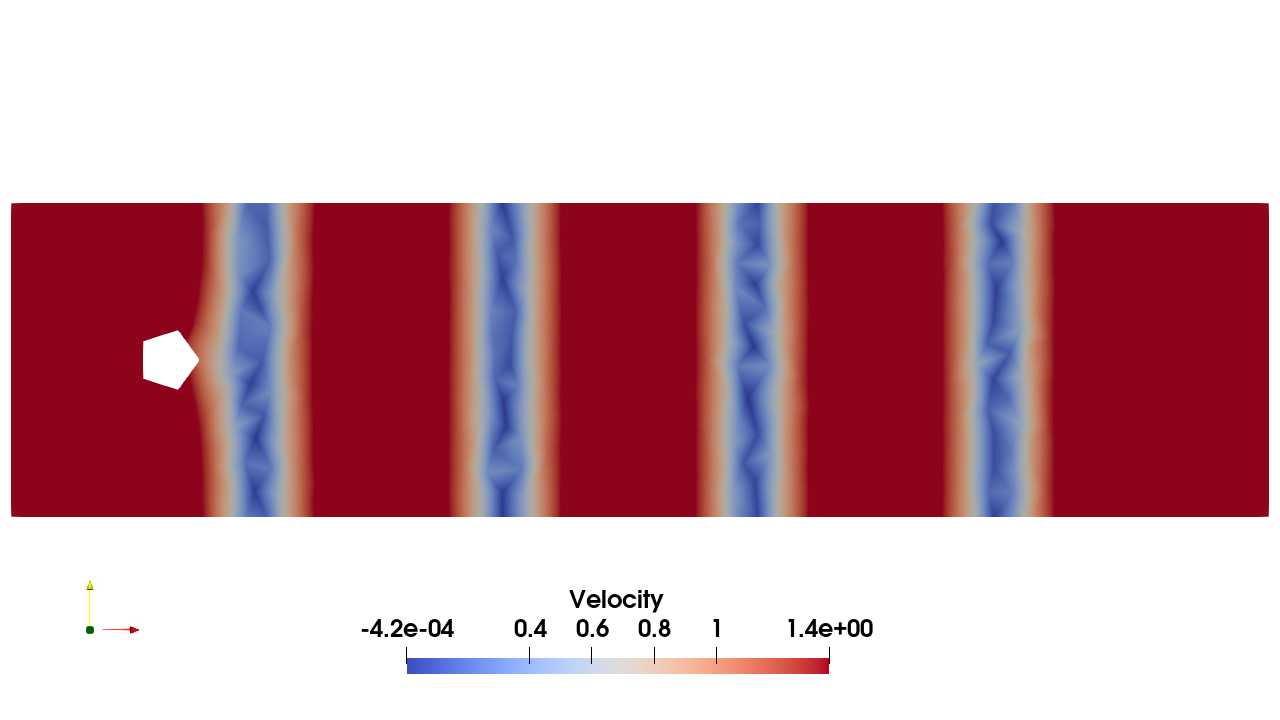

In [4]:
!/content/ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit/bin/pvpython plot_u.py


from IPython.display import Image
Image('plot_u.png')

